<a href="https://colab.research.google.com/github/TidianeLuyet/2024_Geoinformatique_I/blob/main/Geoinformatique_I/IP/Exercices_IP/S4_IP_exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 4 - Fonction et calcul scientifique

## Numpy pour le calcul scientifique et Matplotlib

**Objectifs d'apprentissage**

* Créer de nouveaux tableaux en utilisant `linspace` et `arange`.
* Calculer des formules de base avec les tableaux `numpy`.
Charger des données à partir de fichiers `.npy` * Effectuer des réductions (par exemple `.npy`)
* Effectuer des réductions (par exemple `mean`, `std` sur les tableaux `numpy`)
* Réaliser des tracés linéaires 1D
* Réaliser des diagrammes de dispersion
* Annoter les graphiques avec des titres et des axes

Dans ce problème, nous utilisons des données réelles provenant de flotteurs de profilage océanique. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) sont des instruments robotiques autonomes qui recueillent des données sur la température, la salinité et la pression de l'océan. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) recueillent un "profil" (un ensemble de mesures à différentes profondeurs ou "niveaux").

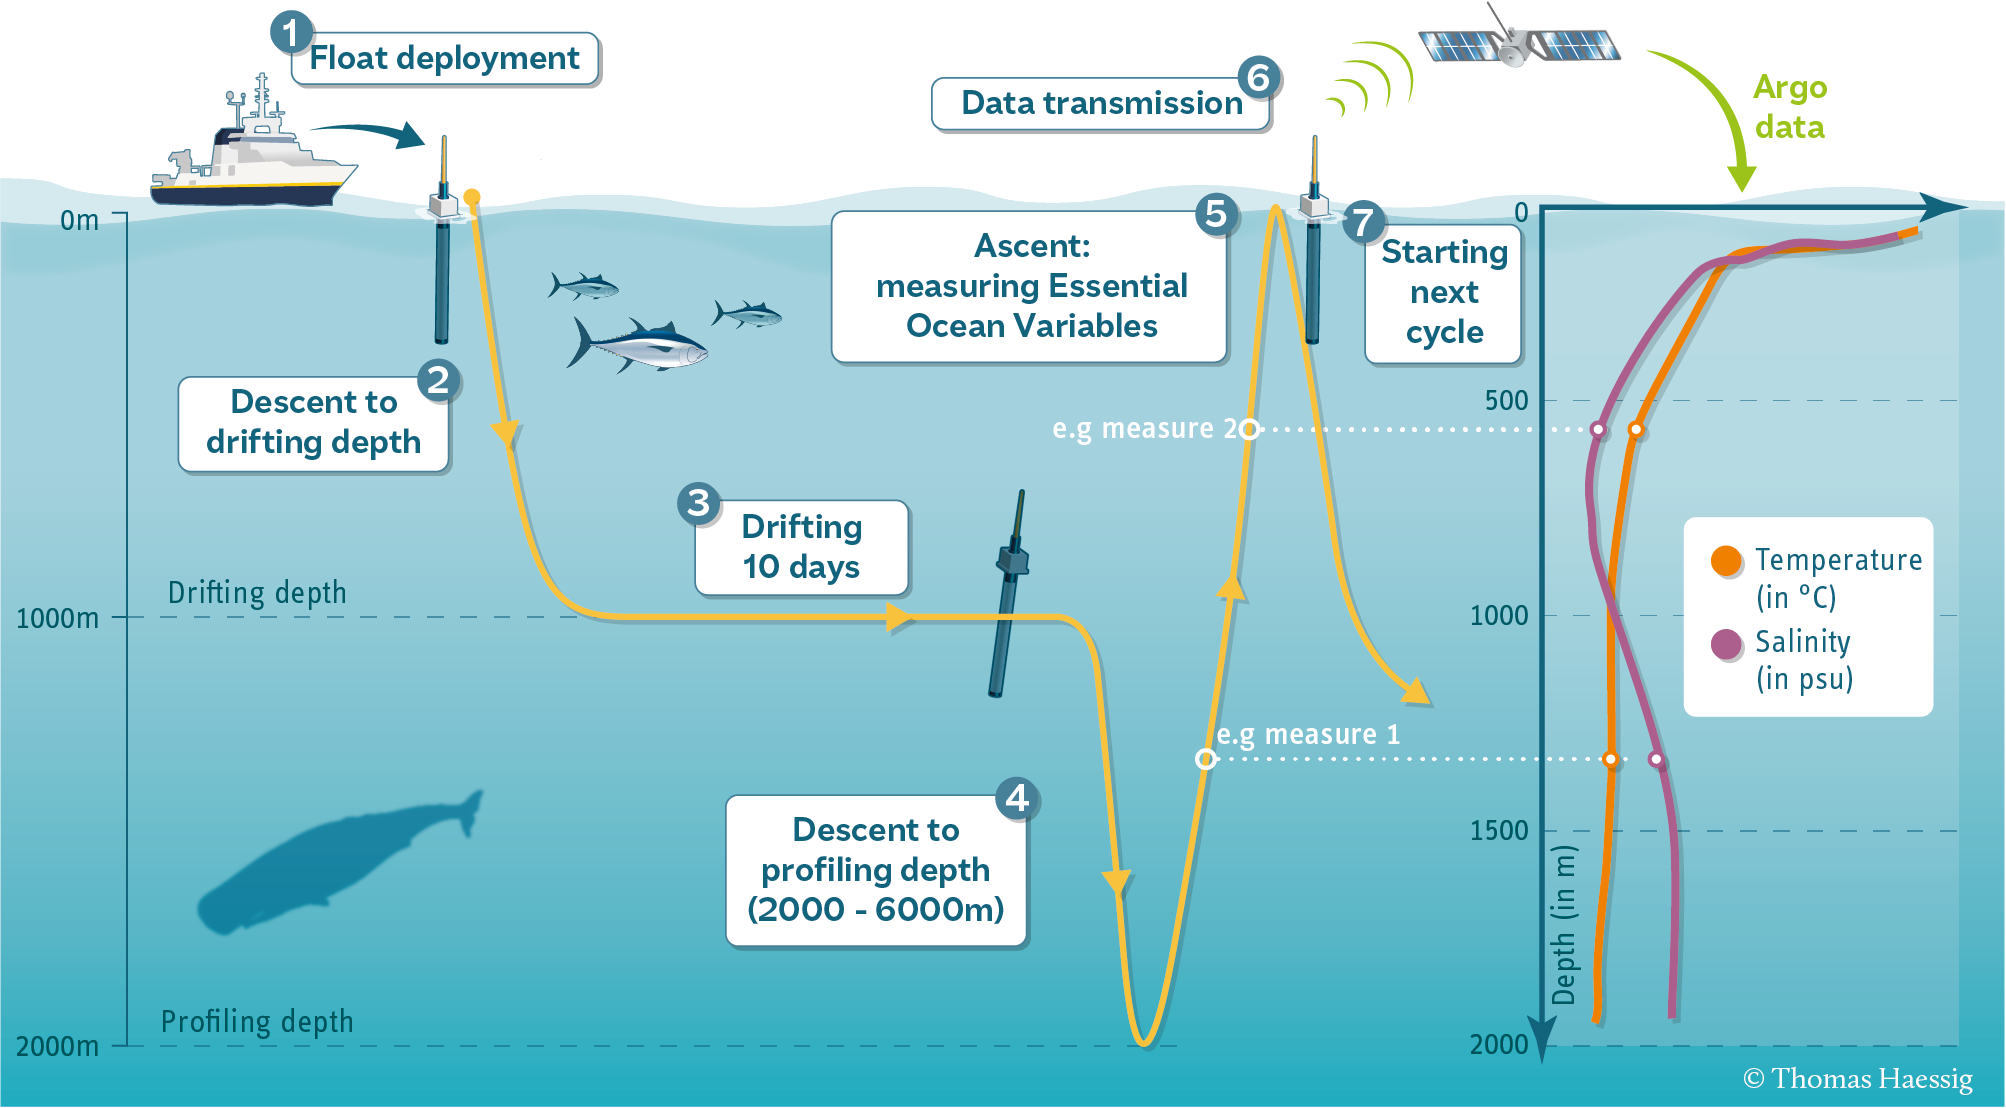


Chaque profil est associé à une latitude, une longitude et une date, ainsi qu'à de nombreux niveaux différents.

Commençons par utiliser [pooch](https://www.fatiando.org/pooch/latest/) pour télécharger les fichiers de données dont nous avons besoin pour cet exercice. Le code suivant vous donnera une liste de fichiers `.npy` que vous pourrez ouvrir à l'étape suivante.

In [4]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

Unzipping contents of '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ' to '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip'


['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy']

In [1]:
import numpy as np

**Q1) Chargez chaque fichier de données sous la forme d'un tableau `numpy`.**

Vous pouvez utiliser les noms que vous voulez pour vos tableaux, mais nous recommandons :

`T` : température

`S` : salinité

`P` : pression

`date` : date

`lat` : latitude

`lon` : longitude

`level` : niveau de profondeur

Astuce 1 : Regardez le nom du fichier (les éléments dans `files`) pour savoir quel fichier correspond à quelle variable.

Astuce 2 : Consultez la documentation de [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Affichez les noms des éléments des fichiers ici

In [2]:
print('lon.npy','S.npy','T.npy','levels.npy','lat.npy','P.npy','date.npy' )

lon.npy S.npy T.npy levels.npy lat.npy P.npy date.npy


Ensuite, chargez les fichiers sous forme de tableaux `numpy`, par exemple en utilisant la compréhension de liste

In [5]:
#@title Code à compléter (au besoin)
P,S,levels,lat,date,T,lon = [np.load(files[i]) for i in range(7)]

**Q2) Recréez le tableau `level` en utilisant `np.arange` et `np.linspace`**.

Conseils :

* La documentation de `np.arange` est [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
* La documentation pour `np.linspace` est [à ce lien](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
* La documentation pour `np.testing.assert_equal` est [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Affichez le tableau `level` (niveau)

In [6]:
print(levels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Recréez le tableau `level` en utilisant `np.arange` et l'appeler `level_arange`

In [7]:
#@title Code à compléter (au besoin)
level_arange = np.arange(0,len(levels))

Vérifiez que `level` et `level_arange` sont égaux en utilisant `np.testing.assert_equal`

In [8]:
np.testing.assert_equal(level_arange,levels)

In [ ]:
#@title Code à compléter (au besoin)
np.___.___(___,level_arange)

Recréer le tableau `level` en utilisant `np.linspace` et l'appeler `level_linspace`

In [9]:
level_linspace = np.linspace(0,77,78)

In [10]:
#@title Code à compléter (au besoin)
___ = np.___(___,___,___)

AttributeError: module 'numpy' has no attribute '___'

Vérifiez que `level` et `level_linspace` sont égaux en utilisant `np.testing.assert_equal`

In [11]:
np.testing.assert_equal(level_linspace,levels)

In [ ]:
#@title Code à compléter (au besoin)
___.___(___,___)

**Q3) Examinez les formes de `T`, `S` et `P` par rapport à `lon`, `lat`, `date` et `niveau`. Comment pensez-vous qu'ils sont liés ?**

Indice : consultez la sous-section [NDArrays](#NDArrays)

Affichez les formes de toutes les variables chargées

In [22]:
#@title Code à compléter (au besoin)
print(levels.shape)
print(lat.shape)
print(lon.shape)
print(date.shape)
print(T.shape)
print(S.shape)
print(P.shape)

(78,)
(75,)
(75,)
(75,)
(78, 75)
(78, 75)
(78, 75)


D'après les formes, quelles sont les dimensions partagées entre les tableaux ?

**Q4) En vous basant sur la formule ci-dessous, calculez la densité de l'eau de mer `relative_density`, par rapport à l'eau pure, en fonction de la température, de la salinité et de la pression.**

`densité_relative`$ = ρ -ρ_{Eau pure} = a \times S +b \times \Theta + c \times \Theta^{2}$

où :

* Les densités $\rho$ et $ρ_{Pure\ eau}$ sont exprimées en unités $kg/m^{3}$.
* Les constantes $a$, $b$ et $c$ sont fournies ci-dessous.
* La fonction permettant de calculer la température conservative $\Theta$ (en unités Celcius) à partir de la température, de la salinité et de la pression est fournie ci-dessous.
* La température $T$ est exprimée en unités Celcius.
* La salinité $S$ est exprimée en unités $g/kg$.
* La pression $p$ est exprimée en unités $dbar$.

Astuce : Les tableaux `numpy` chargés `temperature`, `salinity`, et `pressure` ont déjà les bonnes unités et aucune conversion n'est nécessaire.

Sources :

1) [*Roquet, Fabien, et al. "Defining a simplified yet "realistic" equation of state for seawater." Journal of Physical Oceanography 45.10 (2015) : 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). (Licence)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Voici les constantes a, b et c :

In [13]:
a = 7.718e-1
b = -8.44e-2
c = -4.561e-3

Importons la bibliothèque [`gsw`] (https://teos-10.github.io/GSW-Python/) qui contient la fonction `CS_from_t` pour calculer la température conservative $\Theta$ à partir de la température, de la salinité et de la pression.

In [14]:
!pip install gsw
from gsw import CT_from_t

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 19.8 MB/s eta 0:00:00


Maintenant, c'est à vous de jouer. Voici l'équation pour éviter d'avoir à faire défiler la page vers le haut :

`densité_relative`$ = ρ -ρ_{Pure\ Eau} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculeuz la température conservatrice

Conseil : utilisez [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [15]:
#@title Code à compléter (au besoin)
CT = CT_from_t(S,T,P)

Calculez la "densité relative" à l'aide de l'équation ci-dessus.

In [16]:
#@title Code à compléter (au besoin)
densité_relative = (a*b)+(b*CT)+(c*CT**2)

**Q4) Faites un graphique pour chaque colonne de données dans `T`, `S`, `P`, et
`densité_relative` (quatre plots)**

Pour cette question, nous devons utiliser l'interface [Pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) de la bibliothèque [Matplotlib](https://matplotlib.org/) pour la visualisation, même si nous ne l'avons pas encore étudiée en profondeur en classe. Mais n'ayez crainte, nous vous fournissons des instructions faciles à suivre ci-dessous. 😊

La première étape consiste à importer Pyplot. Il suffit d'exécuter le code ci-dessous.

In [17]:
import matplotlib.pyplot as plt

Ensuite, nous tracerons les variables en fonction de la profondeur de l'océan, `level`. Il suffit de lire la documentation [sur ce lien] (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) pour en déduire la syntaxe correcte. Etiquetez vos axes en utilisant `plt.xlabel` et `plt.ylabel`, et ajoutez un titre en utilisant `plt.title`.

Astuce : L'échelle verticale doit utiliser les données `level` pour être cohérente avec les conventions océanographiques.

Conseil 2 : Chaque graphique doit avoir une ligne pour chaque colonne de données. Le résultat sera désordonné, comme dans le graphique ci-dessous :

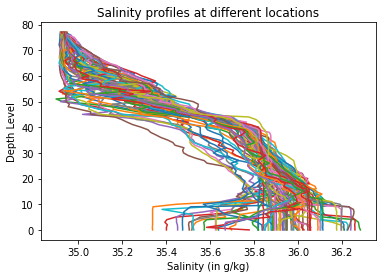

Text(0.5, 1.0, 'Salinity profiles at different locations')

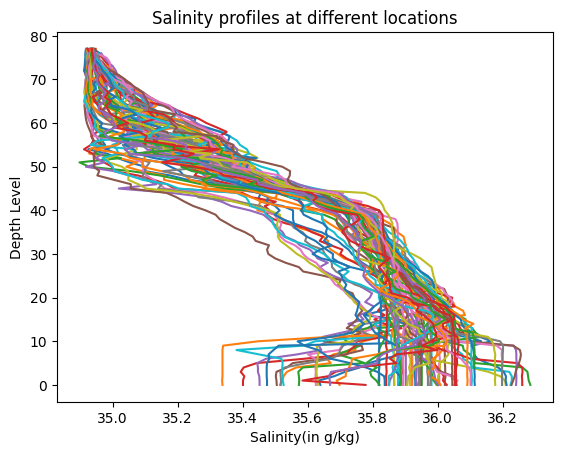

In [18]:
plt.plot(S,levels) ; # Le point-virgule empêche l'impression des objets de ligne
plt.xlabel('Salinity(in g/kg)') # Prend une chaîne de caractères comme argument
plt.ylabel('Depth Level')
plt.title('Salinity profiles at different locations')

Faites plus de plots ci-dessous:

Text(0.5, 1.0, 'Temperature profiles at different locations')

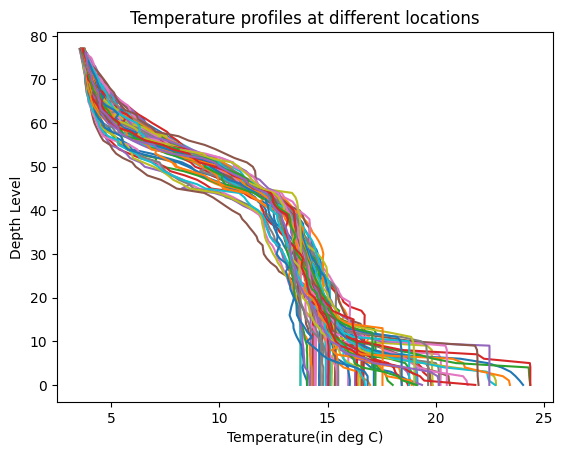

In [19]:
plt.plot(T,levels)
plt.xlabel('Temperature(in deg C)')
plt.ylabel('Depth Level')
plt.title('Temperature profiles at different locations')

Text(0.5, 1.0, 'Pressure profiles at different locations')

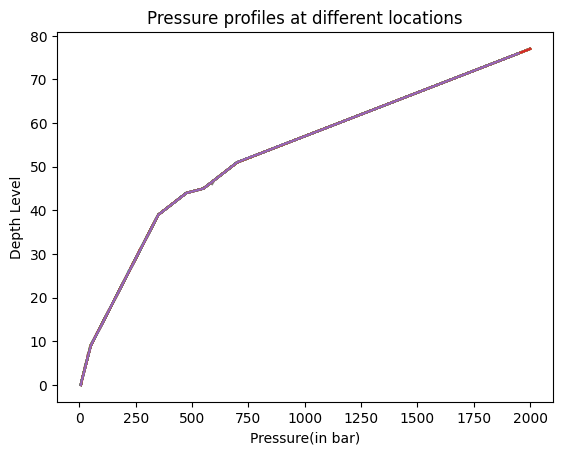

In [20]:
plt.plot(P,levels)
plt.xlabel('Pressure(in bar)')
plt.ylabel('Depth Level')
plt.title('Pressure profiles at different locations')

Text(0.5, 1.0, 'Density profiles at different locations')

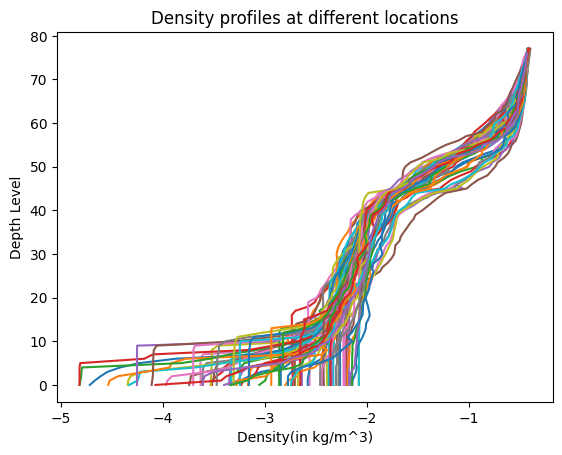

In [21]:
plt.plot(densité_relative,levels)
plt.xlabel('Density(in kg/m^3)')
plt.ylabel('Depth Level')
plt.title('Density profiles at different locations')

**Q5) Calculez la moyenne et l'écart-type de `T`, `S`, `P`, et `seawater_density` à chaque profondeur dans `level`.

Conseil : Vous pouvez lire la documentation sur [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) et [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Conseil 2 : Vous pouvez vérifier que vous avez pris la moyenne et les écarts types le long des axes corrects en vérifiant la "forme" de vos résultats.

Calculez les moyennes...

In [23]:
np.mean(T,axis=1)

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan, 10.80430666, 10.49702667, 10.1749066 ,  9.83453334,
        9.48625332,  9.19793334,  8.66010666,  8.12324001,  7.60221333,
        7.15289333,  6.74250667,  6.39543999,  6.04598667,  5.74538665,
        5.48913333,  5.26604001,  5.08768   ,  4.93479998,  4.77769334,
        4.65368   ,  4.54237334,  4.44274664,  4.35933333,      

In [24]:
np.mean(S,axis=1)


array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan, 35.41392634, 35.3810557 , 35.34845245, 35.31531555,
       35.28392568, 35.26568334, 35.2389473 , 35.21583745, 35.19686081,
       35.18231257, 35.1648436 , 35.15073542, 35.12509338, 35.10155869,
       35.08199799, 35.06317012, 35.0490097 , 35.03678253, 35.02174266,
       35.01135579, 35.00212936, 34.99386297, 34.98810328,      

In [25]:
np.mean(P,axis=1)


array([   6.43466671,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,  575.68400146,  600.42400716,
        625.30800456,  650.34533773,  675.33333984,  700.37067546,
        750.42400716,  800.36666992,  850.38534017,  900.4613387 ,
        950.45067383, 1000.38534261, 1050.38534668, 1100.45734

In [26]:
np.mean(densité_relative,axis=1)

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan, -1.49674212, -1.44147577, -1.38441255, -1.32516352,
       -1.26552082, -1.2166767 , -1.12760027, -1.04100497, -0.9595479 ,
       -0.89100117, -0.83005749, -0.77967398, -0.7299853 , -0.68825723,
       -0.65321531, -0.62305117, -0.59919467, -0.57884452, -0.55824076,
       -0.54198724, -0.52749716, -0.51458817, -0.50376016,      

In [ ]:
#@title Code à compléter (au besoin)




AxisError: axis 0 is out of bounds for array of dimension 0

... et les écarts types.

In [27]:
np.std(T,axis=1)
np.std(S,axis=1)
np.std(P,axis=1)
np.std(densité_relative,axis=1)

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan, 0.14674369, 0.15440007, 0.15912594, 0.16376903,
       0.16529405, 0.1627152 , 0.15837197, 0.14818116, 0.13931549,
       0.12745486, 0.11740252, 0.10916485, 0.09777814, 0.09172523,
       0.0850365 , 0.07680951, 0.07070583, 0.06368493, 0.05741857,
       0.05073432, 0.04524268, 0.04065029, 0.03638077,        nan,
              nan,        nan,        nan,        nan,        

In [ ]:
#@title Code à compléter (au besoin)
___ = ___.___(___,___)

Vérifiez qu'elles ont la même forme que vos coordonnées de niveau vertical `lev` :

In [29]:
np.testing.assert_equal(np.std(T,axis=1).shape,levels.shape)
np.testing.assert_equal(np.mean(T,axis=1).shape,levels.shape)

In [ ]:
#@title Code à compléter (au besoin)
np.testing.assert_equal(___.shape,lev.shape)

**Q6) Faites maintenant des tracés similaires, mais ne montrez que les moyennes `T`, `S`, `P`, et `densité_de_l'eau_de_mer` à chaque profondeur. Faites apparaître les barres d'erreur sur chaque graphique en utilisant les écarts-types**.

Astuce : Si vous vous sentez aventureux, vous pouvez utiliser directement la fonction [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html).

Astuce 2 : Vous devriez obtenir des graphiques similaires à celui ci-dessous

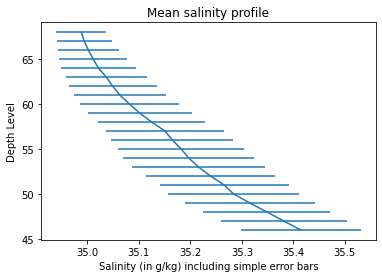

Text(0.5, 1.0, 'Mean salinity profile')

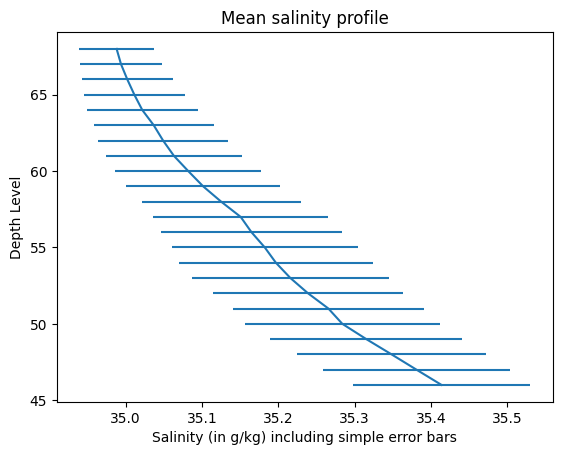

In [30]:
plt.errorbar(np.mean(S,axis=1),levels,xerr=np.std(S,axis=1))
plt.xlabel('Salinity (in g/kg) including simple error bars')
plt.ylabel('Depth Level')
plt.title('Mean salinity profile')

Encore trois plots et nous serons prêts 🙂 .

Text(0.5, 1.0, 'Mean temperature profile')

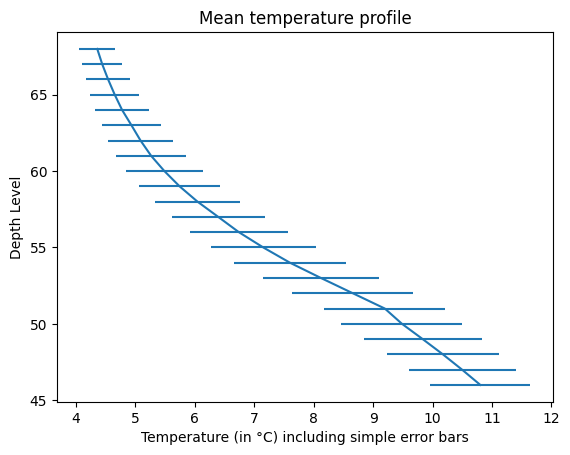

In [31]:
plt.errorbar(np.mean(T,axis=1),levels,xerr=np.std(T,axis=1))
plt.xlabel('Temperature (in °C) including simple error bars')
plt.ylabel('Depth Level')
plt.title('Mean temperature profile')

Text(0.5, 1.0, 'Mean pressure profile')

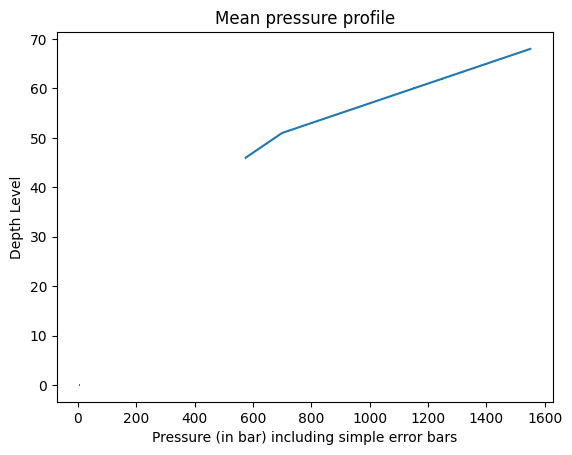

In [36]:
plt.errorbar(np.mean(P,axis=1),levels,xerr=np.std(P,axis=1))
plt.xlabel('Pressure (in bar) including simple error bars')
plt.ylabel('Depth Level')
plt.title('Mean pressure profile')

Text(0.5, 1.0, 'Mean density profile')

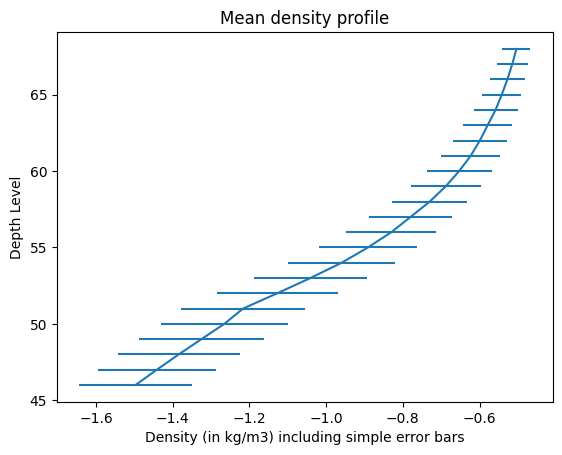

In [38]:
plt.errorbar(np.mean(densité_relative,axis=1),levels,xerr=np.std(densité_relative,axis=1))
plt.xlabel('Density (in kg/m3) including simple error bars')
plt.ylabel('Depth Level')
plt.title('Mean density profile')

**Q7) Prise en compte des données manquantes**

Les profils contiennent de nombreuses valeurs manquantes. Celles-ci sont indiquées par la valeur spéciale "Not a Number", ou `np.nan`.

Lorsque vous prenez la moyenne ou l'écart type des données contenant des NaN, le résultat entier devient `NaN`. Au lieu de cela, si vous utilisez les fonctions spéciales `np.nanmean` et `np.nanstd`, vous dites à NumPy d'ignorer les NaN.

Recalculez les moyennes et les écarts types comme dans les sections précédentes en utilisant ces fonctions et tracez les résultats.

Conseil : Liens vers la documentation [`np.nanmean`](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) et la documentation [`np.nanstd`](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculez les moyennes ci-dessous en ignorant les valeurs manquantes. Nous espérons que vous pouvez maintenant trouver la syntaxe complète vous-même 😎

In [40]:
np.nanmean(S,axis=1)
np.nanmean(T,axis=1)
np.nanmean(P,axis=1)
np.nanmean(densité_relative,axis=1)

array([-2.99523676, -2.98627101, -2.97118118, -2.94666585, -2.90071552,
       -2.84545371, -2.776355  , -2.69644642, -2.62941569, -2.59852349,
       -2.50325314, -2.45625818, -2.40960084, -2.37820392, -2.34758168,
       -2.32724022, -2.30888883, -2.29215998, -2.27489236, -2.25651284,
       -2.23719233, -2.22003924, -2.20581772, -2.18768894, -2.17024212,
       -2.15382399, -2.13841532, -2.12488449, -2.10976932, -2.09337396,
       -2.07821114, -2.06478995, -2.04892524, -2.03186146, -2.01603558,
       -2.00088977, -1.9866375 , -1.97142818, -1.95684587, -1.94059628,
       -1.89780291, -1.85447593, -1.81191638, -1.76327834, -1.71773763,
       -1.55649211, -1.49674212, -1.44147577, -1.38441255, -1.32516352,
       -1.26552082, -1.2166767 , -1.12760027, -1.04100497, -0.9595479 ,
       -0.89100117, -0.83005749, -0.77967398, -0.7299853 , -0.68825723,
       -0.65321531, -0.62305117, -0.59919467, -0.57884452, -0.55824076,
       -0.54198724, -0.52749716, -0.51458817, -0.50376016, -0.49

De même, recalculez les écarts types en ignorant les valeurs manquantes.

In [41]:
np.nanstd(S,axis=1)
np.nanstd(T,axis=1)
np.nanstd(P,axis=1)
np.nanstd(densité_relative,axis=1)

array([0.73990383, 0.72380329, 0.71526683, 0.69249713, 0.65185541,
       0.60155099, 0.5384463 , 0.48685113, 0.43380607, 0.42204435,
       0.29397266, 0.24708433, 0.20206828, 0.17785285, 0.15077706,
       0.13982495, 0.13474309, 0.12909661, 0.12108547, 0.11858426,
       0.11421007, 0.1127042 , 0.11248636, 0.10850023, 0.10458802,
       0.10324163, 0.1018286 , 0.10142094, 0.10247977, 0.10464896,
       0.10485783, 0.10374686, 0.10250316, 0.10457139, 0.10318155,
       0.10363384, 0.10553798, 0.10635774, 0.10876676, 0.10903534,
       0.10979649, 0.11210958, 0.11448936, 0.11938796, 0.13116781,
       0.15116709, 0.14674369, 0.15440007, 0.15912594, 0.16376903,
       0.16529405, 0.1627152 , 0.15837197, 0.14818116, 0.13931549,
       0.12745486, 0.11740252, 0.10916485, 0.09777814, 0.09172523,
       0.0850365 , 0.07680951, 0.07070583, 0.06368493, 0.05741857,
       0.05073432, 0.04524268, 0.04065029, 0.03638077, 0.03080831,
       0.026082  , 0.02062105, 0.01699869, 0.01349467, 0.01073

Text(0.5, 1.0, 'Mean salinity profile')

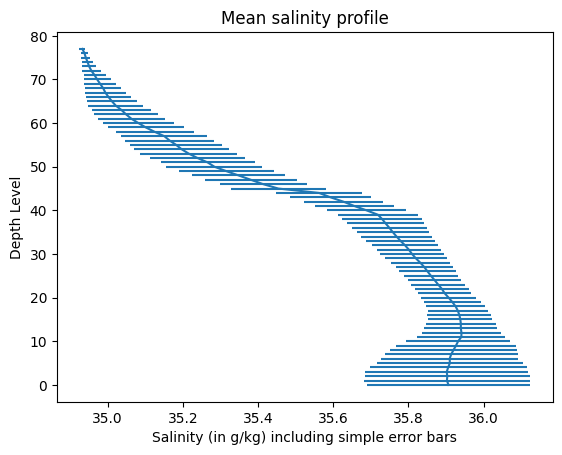

In [42]:
plt.errorbar(np.nanmean(S,axis=1),levels,xerr=np.nanstd(S,axis=1))
plt.xlabel('Salinity (in g/kg) including simple error bars')
plt.ylabel('Depth Level')
plt.title('Mean salinity profile')

Text(0.5, 1.0, 'Mean temperature profile')

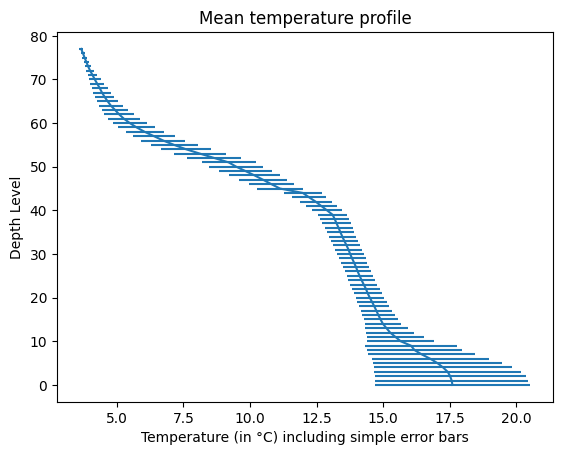

In [43]:
plt.errorbar(np.nanmean(T,axis=1),levels,xerr=np.nanstd(T,axis=1))
plt.xlabel('Temperature (in °C) including simple error bars')
plt.ylabel('Depth Level')
plt.title('Mean temperature profile')

Text(0.5, 1.0, 'Mean pressure profile')

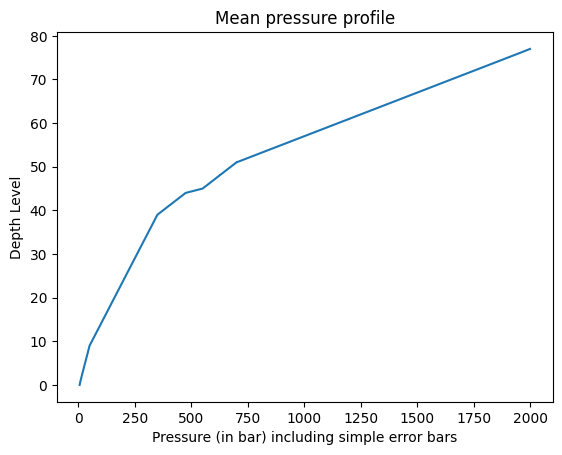

In [44]:
plt.errorbar(np.nanmean(P,axis=1),levels,xerr=np.nanstd(P,axis=1))
plt.xlabel('Pressure (in bar) including simple error bars')
plt.ylabel('Depth Level')
plt.title('Mean pressure profile')

Text(0.5, 1.0, 'Mean density profile')

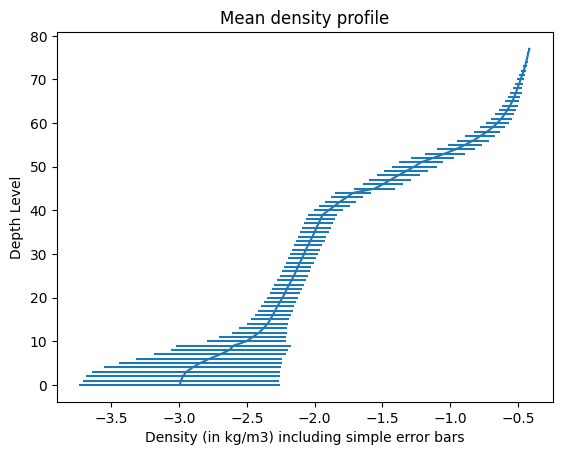

In [45]:
plt.errorbar(np.nanmean(densité_relative,axis=1),levels,xerr=np.nanstd(densité_relative,axis=1))
plt.xlabel('Density (in kg/m3) including simple error bars')
plt.ylabel('Depth Level')
plt.title('Mean density profile')

**Q8) Créez un diagramme de dispersion des coordonnées longitudinales (`lon`) et latitudinales (`lat`) des flotteurs ARGO.**

Encore une fois, nous n'en avons pas parlé dans le tutoriel, mais il existe une fonction de diagramme de dispersion très pratique appelée [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) fournie par l'interface Pyplot.

Bonus : Etiqueter votre figure en utilisant `plt.xlabel`, `plt.ylabel`, et `plt.title`.

Bonus 2 : Augmentez la taille de police de vos étiquettes en ajoutant un argument `fontsize=` aux fonctions d'étiquettes.

Bonus 3 : Rendez votre diagramme de dispersion plus beau en changeant les arguments de [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) listés dans la documentation, par exemple `s=`.

Text(0.5, 1.0, 'Argonaut locations')

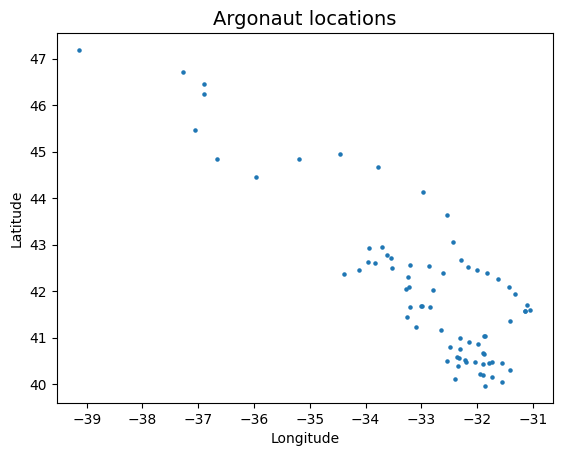

In [52]:
plt.scatter(lon,lat,s=5)
plt.xlabel('Longitude',fontsize=10)
plt.ylabel('Latitude',fontsize=10)
plt.title('Argonaut locations',fontsize=14)




In [ ]:
#@title Code à compléter (au besoin)
plt.scatter(___,___)
___ # Bonus
___ # Plus de bonus

## Fonctions

**Q1) Ecrivez une fonction pour convertir l'unité que vous avez choisie pour les masses planétaires en $M_{Terre}$, la masse de la Terre**.

Par exemple, la masse de Jupiter est :

$M_{Jupiter} \approx 1898\times10^{24}kg \approx 318 M_{Terre}$

In [53]:
planetdict = {'mercure':0.330,'vénus':4.87,'terre':5.97,
              'mars':0.642,'jupiter':1898,'saturne':568,'uranus':86.8,'nepturne':102, 'pluto':0.013}

# unit: 10^24 kg

In [56]:
# Ecrivez votre fonction ici
# La fonction doit prendre la masse de la planète que vous voulez (par exemple, planetdict['mars']) et la diviser par la masse de la Terre.
# (planetdict['terre'])
def convert_mass_Mterre(mass=planetdict['terre']):
  return mass/planetdict['terre']
# Testez que cela fonctionne pour jupiter (planetdict['jupiter']), la fonction devrait retourner 317.92294807370183
convert_mass_Mterre(planetdict['jupiter'])

317.92294807370183

In [ ]:
#@title Code à compléter (au besoin)
# Ecrivez votre fonction ici
# La fonction doit prendre la masse de la planète que vous voulez (par exemple, planetdict['mars']) et la diviser par la masse de la Terre.
# (planetdict['terre'])
def convert_mass_Mterre(______=____):
  return _________/planetdict['terre']

#tester que cela fonctionne pour jupiter (planetdict['jupiter']), la fonction devrait retourner 317.92294807370183
convert_mass_Mterre(____________)

**Q2) Ecrivez maintenant une fonction unique qui peut convertir l'unité que vous avez choisie pour les masses planétaires en $M_{Terre}$ ou $M_{Jupiter}$ selon le mot-clé que vous avez spécifié**.

In [ ]:
# Écrivez votre fonction ici

# Vérifiez que votre fonction fonctionne : convertissez Mjupiter en Mterre et Mjupiter,
# Vous devriez voir 317.923 (Mterre) et 1.0 (Mjupiter)

In [57]:
#@title Code à compléter (au besoin)
# Écrivez votre fonction ici
def convert_m_Mterrejupiter(mass=0,ourplanet='jupiter') :
  return mass/planetdict[ourplanet]

# Vérifiez que votre fonction fonctionne : convertissez Mjupiter en Mterre et Mjupiter,
# Vous devriez voir 317.923 (Mterre) et 1.0 (Mjupiter)
print(convert_m_Mterrejupiter(planetdict['jupiter'],'terre'),convert_m_Mterrejupiter(planetdict['jupiter'],'jupiter'))

317.92294807370183 1.0


In [58]:
# Stocker le Mjupiter pour Q3
Mjupiter = convert_m_Mterrejupiter(planetdict['jupiter'], 'jupiter')

**Q3) Ecrivez une fonction qui prend un argument (la masse en $M_{Jupiter}$) et renvoie deux arguments (la masse en $M_{Terre}$ et la masse dans l'unité que vous avez choisie [la planète que vous voulez]).

In [ ]:
# Écrivez votre fonction ici
# Vérifiez que la conversion de la masse de Jupiter en $M_{Terre}$ et en $M_{Terre}$ fonctionne.
# l'unité choisie (par exemple, la planète Mars)

In [62]:
#@title Code à compléter (au besoin)
# Écrivez votre fonction ici
def mass_conversion_two_arguments(mass,planet='jupiter') :
  a = mass/planetdict['terre'] # Terre
  b = mass/planetdict['mars'] # La planète que vous voulez utiliser comme référence
  return a,b
# Vérifiez que la conversion de la masse de Jupiter en $M_{Terre}$ et en $M_{Terre}$ fonctionne.
# l'unité choisie (par exemple, la planète Mars)
print(mass_conversion_two_arguments('jupiter','mars'))

TypeError: unsupported operand type(s) for /: 'str' and 'float'

In [ ]:
# Bonus : Utilisez la fonction de Q10 pour convertir la masse de Neptune en $M_{Jupiter}$.
# puis la fonction de Q3 pour la reconvertir dans l'unité que vous avez choisie
# Retrouvez-vous la valeur originale ?